<a href="https://colab.research.google.com/github/dehpour/Reactor-Antineutrino-Flux-Analysis/blob/main/Determination%20of%20the%20Antineutrino%20Spectrum%20from%20Beta%20Spectrum/U235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from sympy import diff,solve,Eq,exp

## Load beta spectra

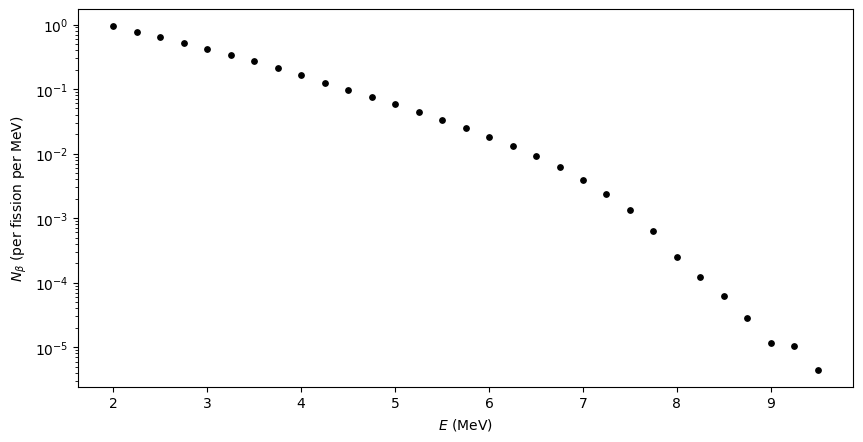

In [2]:
beta_spectra = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/Determination%20of%20the%20Antineutrino%20Spectrum%20from%20Beta%20Spectrum/db/235U_beta_spectra.csv')
E, N_beta = beta_spectra['E'], beta_spectra['N_beta']

plt.figure(figsize=(10, 5),dpi=100)
plt.yscale("log")

plt.scatter(E, N_beta, c='black', s=15)

plt.xlabel(r'$E$'' (MeV)')
plt.ylabel(r'$N_\beta$'' (per fission per MeV)')

plt.show()

## Load and interpolate coeff

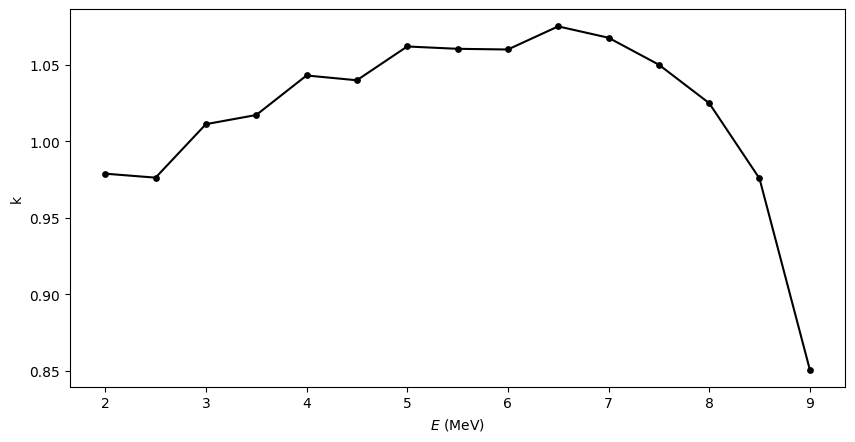

In [3]:
coeff = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/Determination%20of%20the%20Antineutrino%20Spectrum%20from%20Beta%20Spectrum/db/235U_coeff.csv')

k = interpolate.interp1d(coeff['E'], coeff['k'])

plt.figure(figsize=(10, 5),dpi=100)

plt.scatter(coeff['E'], coeff['k'], c='black', s=15)
plt.plot(coeff['E'], coeff['k'], c='black')

plt.xlabel(r'$E$'' (MeV)')
plt.ylabel('k')

plt.show()

## Find nutrino spectra from beta spectra

In [4]:
lim = sum(E+0.511<max(coeff['E']))

i = 0
N_nu = []

while i < lim:
    N_nu.append(k(E[i] + 0.511) * N_beta[i])
    i += 1

## Fit on the nutrino spectra

Polynomial of order 2



In [5]:
from sympy.abc import a,b,c
chi_sq = []

for i in range (len(N_nu)):
    chi_sq.append(((np.log(N_nu[i]) - (a + b*(E[:lim][i]+0.511) + c*(E[:lim][i]+0.511)**2))/np.log(0.0001))**2)
    i += 1
    
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a),0)
eq2 = Eq(diff(chi_sq,b),0)
eq3 = Eq(diff(chi_sq,c),0)
sol = solve((eq1,eq2,eq3), (a, b, c))
a_0, a_1, a_2 = np.float(sol[a]), np.float(sol[b]), np.float(sol[c])

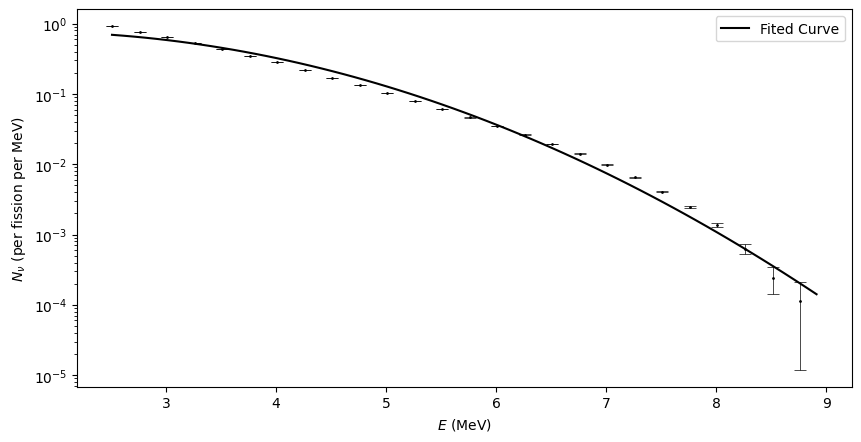

In [6]:
plt.figure(figsize=(10, 5),dpi=100)
plt.yscale("log")

plt.scatter(E[:lim]+0.511, N_nu[:lim], c='black', s=1)
plt.errorbar(E[:lim]+0.511, N_nu[:lim], yerr=(0.0001), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5)

ee = np.arange(E[0]+0.511, E[lim]+0.511, 0.1)
plt.plot(ee,np.exp(a_0+a_1*ee+a_2*ee**2), label="Fited Curve", c='black')

plt.xlabel(r'$E$'' (MeV)')
plt.ylabel(r'$N_\nu$'' (per fission per MeV)')

plt.legend()
plt.show()